In [1]:
import os
import scipy.io as sio
import numpy as np
import pandas as pd
import nibabel as nib
from dotenv import load_dotenv

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec

from utils.preproc import load_data, extract_event_info, create_event_dataframe
from utils.glm import run_glm_analysis, compute_contrasts, plot_contrasts
from utils.psth import map_events_to_frame_times, process_activation, proc_pixel

In [2]:
load_dotenv()
base_dir = os.getenv('BASE_DIR')
task_dir = os.path.join(base_dir, 'task_data', 'Grouper_Audiocue_data')

# GLM

In [3]:
def plot_contrasts(contrast_results, brain_shape):
    # this function only applys to the reward-airpuff-idle task after 05/23/2024
    # and only plots 6 contrasts
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, (key, value) in enumerate(contrast_results.items()):
        sns.heatmap(np.rot90(value.reshape(brain_shape[0], brain_shape[2])), ax=axes[i], cmap="bwr", vmin=-15, vmax=15)
        axes[i].set_title(key)

    plt.tight_layout()
    plt.show()
    

In [4]:
def glm(data_dir, brain_filename, event_filename):
    brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
    behave_codes, absolute_starttime = extract_event_info(event_mat, method='glm')
    event_df = create_event_dataframe(behave_codes, absolute_starttime, method='glm')
    labels, estimators, X = run_glm_analysis(brain_data, event_df)
    contrast_results = compute_contrasts(labels, estimators, X)
    plot_contrasts(contrast_results, brain_data.shape)

    return contrast_results

## 05/31/2024 Plane 7.5

Brain data shape: (128, 1, 143, 9000)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset
  warnings.warn(


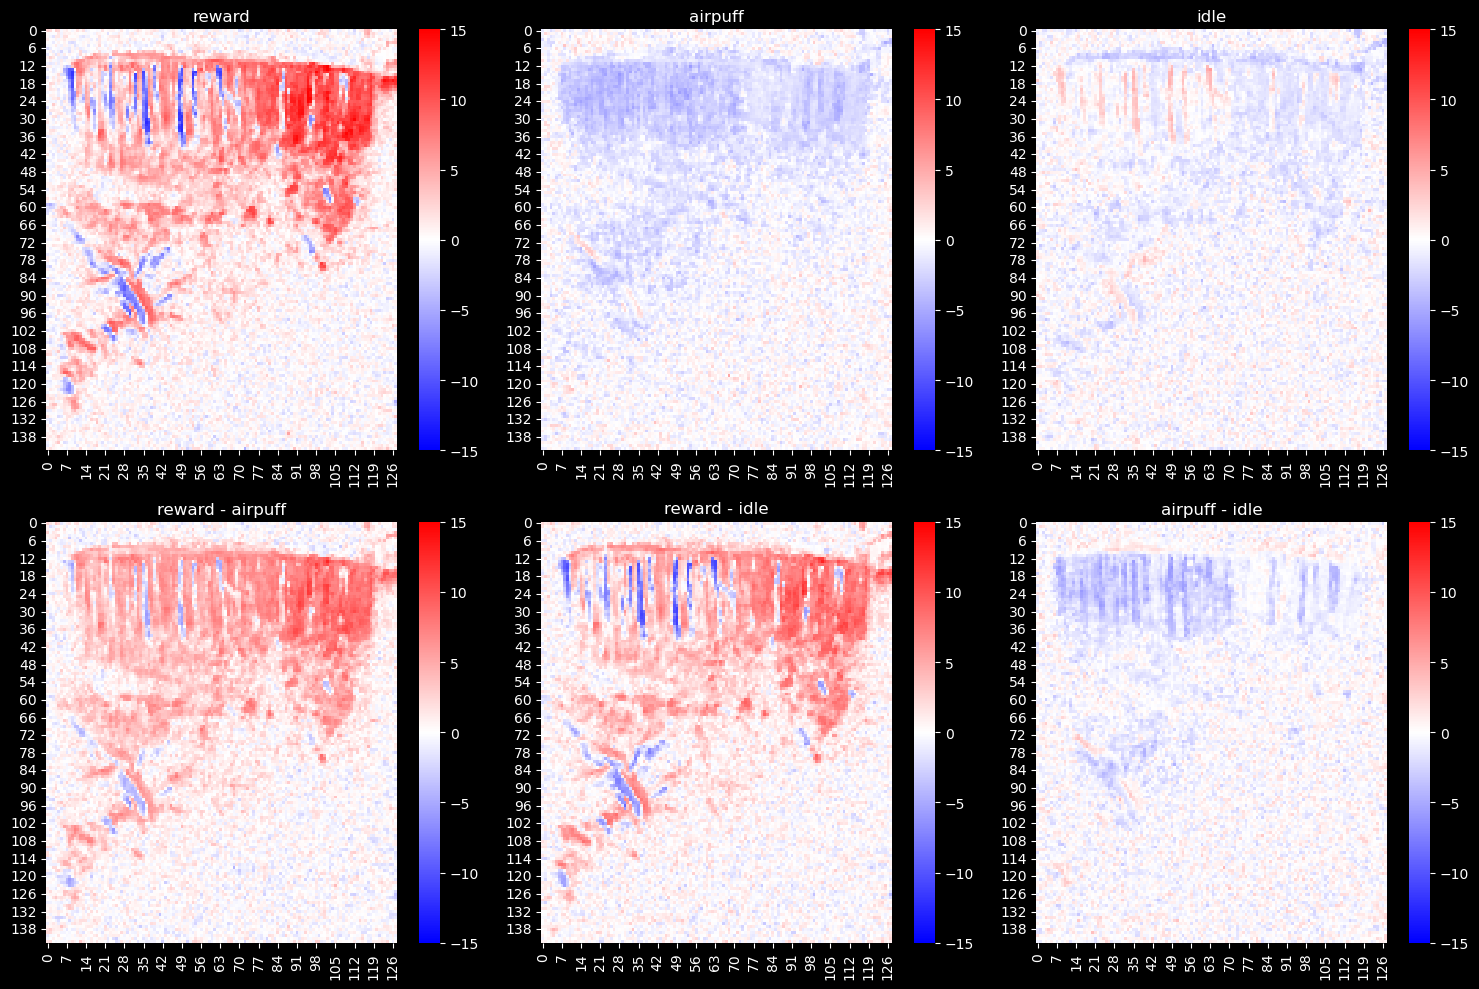

In [12]:

data_dir = os.path.join(task_dir, 'Grouper_0531_7.5')
brain_filename = 'Grouper_audiocue_053124_corrected3.nii.gz'
event_filename = 'mldata.mat'

results75 = glm(data_dir, brain_filename, event_filename)

In [18]:
def save_single_slice_as_corrected(slice_data: np.ndarray, corrected_image_path: str, output_slice_path: str):
    """
    Saves a single slice image using the affine and header information from the corrected 4D image.

    Parameters:
        slice_data (np.ndarray): The 2D or 3D single slice data array.
        corrected_image_path (str): Path to the corrected 4D image to match the format.
        output_slice_path (str): Path to save the new single slice image.
    """
    # Load the corrected 4D image to get the affine and header
    corrected_img = nib.load(corrected_image_path)
    corrected_affine = corrected_img.affine
    corrected_header = corrected_img.header

    # Check the dimensionality of the slice data
    if slice_data.ndim == 2:
        # If it's 2D, expand to 3D to match the corrected image's slice format
        slice_data = slice_data[:, :, np.newaxis]

    # Ensure the slice data matches the corrected image's dimensions
    if slice_data.shape[:2] != corrected_img.shape[:2]:
        raise ValueError("The dimensions of the slice data do not match the corrected image dimensions.")

    # Create a new Nifti1Image with the single slice data
    new_slice_img = nib.Nifti1Image(slice_data, corrected_affine, corrected_header)

    # Save the single slice image
    nib.save(new_slice_img, output_slice_path)
    print(f"Single slice image saved to {output_slice_path}")

In [19]:

single_slice_data = results75['reward'].reshape(128, 1, 143)
corrected_image_path = os.path.join(data_dir, brain_filename)
output_slice_path =  os.path.join(base_dir, 'output', 'Grouper_audiocue_053124_corrected3_glm_reward.nii.gz')

save_single_slice_as_corrected(single_slice_data, corrected_image_path, output_slice_path)


Single slice image saved to /Users/yibeichen/Desktop/fusi/output/Grouper_audiocue_053124_corrected3_glm_reward.nii.gz


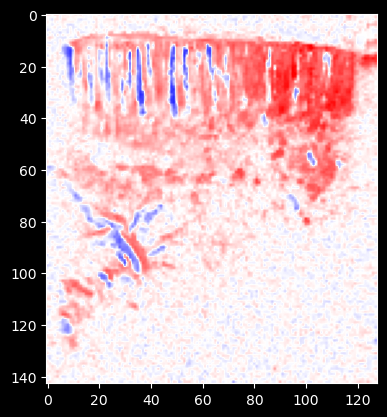

In [20]:
test = nib.load(output_slice_path).get_fdata()
plt.imshow(np.rot90(test[:, 0, :]), cmap="bwr", vmin=-15, vmax=15)
plt.show()

In [23]:
from utils.registration import slice2chunk_align
ref_img_file = os.path.join(base_dir, "fus2mri", "fusi_corrected-transformed.nii.gz")
moving_img_file = os.path.join(base_dir, 'output', 'Grouper_audiocue_053124_corrected3_glm_reward.nii.gz')
transform_file = os.path.join(base_dir, "slice2chunk_grouper", "053124_7-5", "Transform.h5")

output_file = os.path.join(base_dir, 'output', 'Grouper_audiocue_053124_corrected3_glm_reward_aligned.nii.gz')
slice2chunk_align(ref_img_file, moving_img_file, transform_file, output_file)

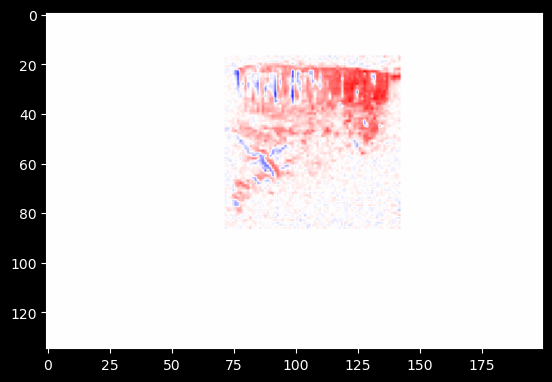

In [24]:
test = nib.load(output_file).get_fdata()
plt.imshow(np.rot90(test[78, :, :]), cmap="bwr", vmin=-15, vmax=15)
plt.show()

## 06/03/2024 Plane 8.5

Brain data shape: (128, 1, 143, 9000)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset
  warnings.warn(


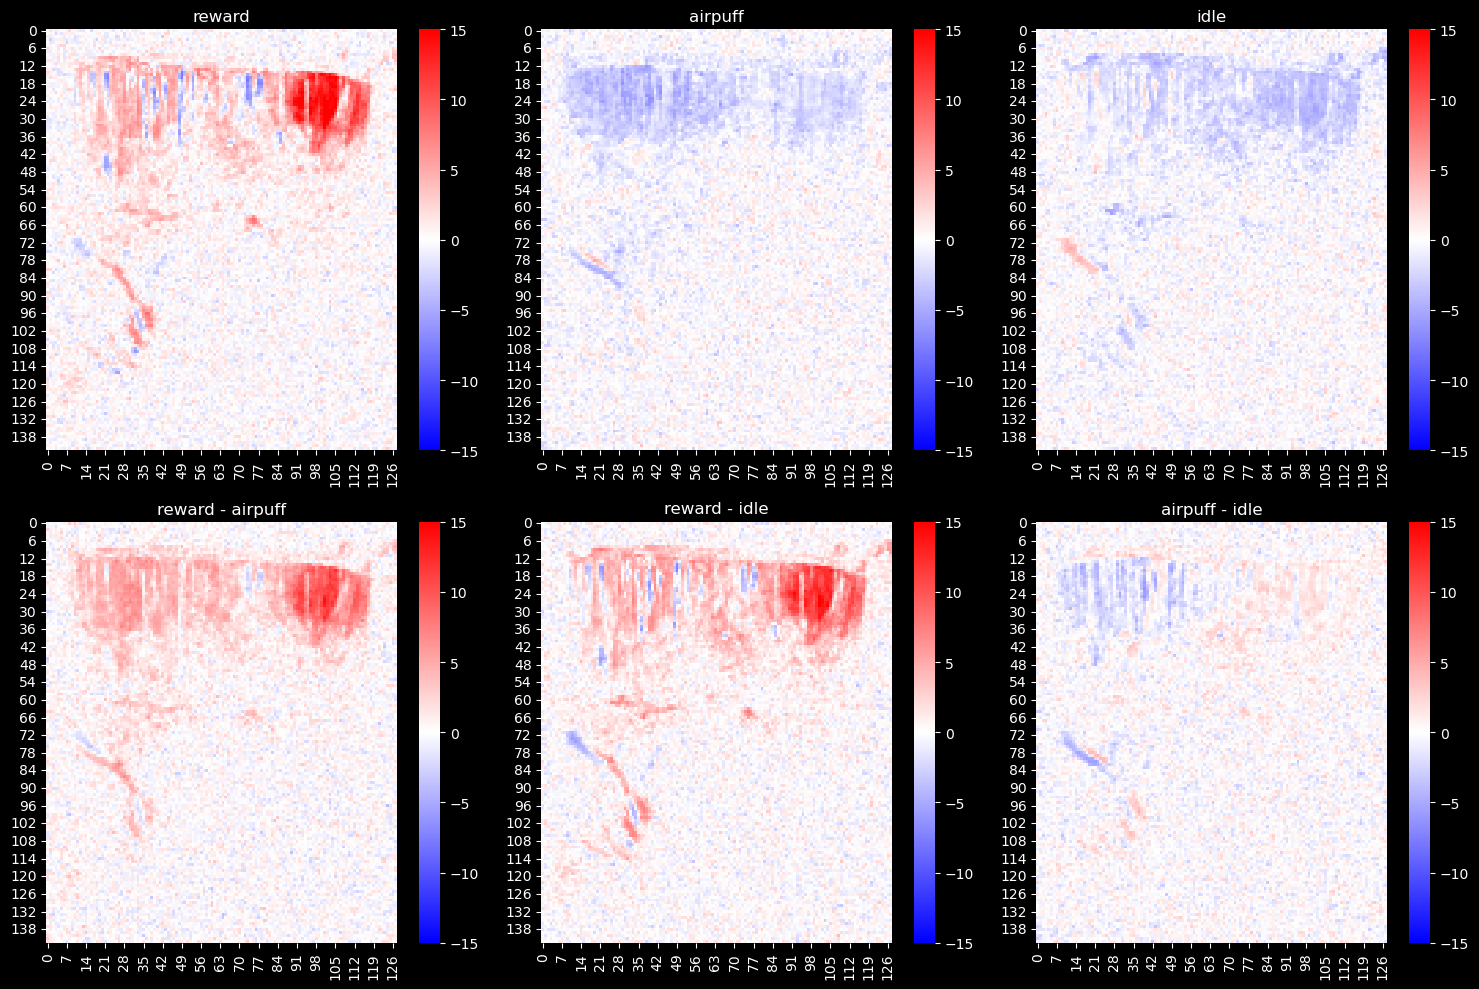

In [27]:
data_dir = os.path.join(task_dir, 'Grouper_0603_8.5')
brain_filename = 'Grouper_audiocue_060324_corrected3.nii.gz'
event_filename = 'mldata.mat'

results85 = glm(data_dir, brain_filename, event_filename)

In [28]:

single_slice_data = results85['reward'].reshape(128, 1, 143)
corrected_image_path = os.path.join(data_dir, brain_filename)
output_slice_path =  os.path.join(base_dir, 'output', 'Grouper_audiocue_060324_corrected3_glm_reward.nii.gz')

save_single_slice_as_corrected(single_slice_data, corrected_image_path, output_slice_path)


Single slice image saved to /Users/yibeichen/Desktop/fusi/output/Grouper_audiocue_060324_corrected3_glm_reward.nii.gz


In [29]:
from utils.registration import slice2chunk_align
ref_img_file = os.path.join(base_dir, "fus2mri", "fusi_corrected-transformed.nii.gz")
moving_img_file = os.path.join(base_dir, 'output', 'Grouper_audiocue_060324_corrected3_glm_reward.nii.gz')
transform_file = os.path.join(base_dir, "slice2chunk_grouper", "060324_8-5", "Transform.h5")

output_file = os.path.join(base_dir, 'output', 'Grouper_audiocue_060324_corrected3_glm_reward_aligned.nii.gz')
slice2chunk_align(ref_img_file, moving_img_file, transform_file, output_file)

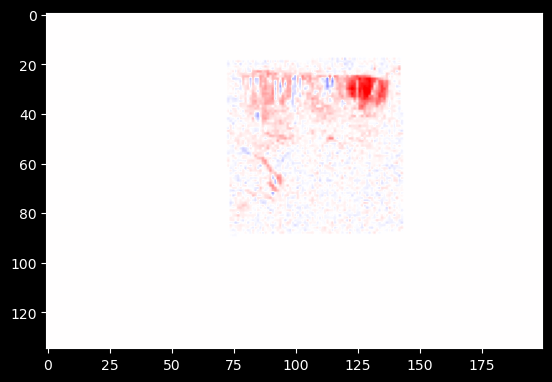

In [31]:
test = nib.load(output_file).get_fdata()
plt.imshow(np.rot90(test[88, :, :]), cmap="bwr", vmin=-15, vmax=15)
plt.show()

# PSTH

In [ ]:
# Function to plot heatmaps
def plot_heatmaps(data, brain_data, title_prefix, tasks=['Reward', 'Airpuff', 'Idle']):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, ax in enumerate(axes):
        sns.heatmap(data[:, i].reshape(brain_data.shape[0], brain_data.shape[2]).T, ax=ax, cmap="bwr", vmin=-0.2, vmax=0.2)
        ax.set_title(f"{title_prefix}: {tasks[i]}")

    plt.tight_layout()
    plt.show()


In [ ]:
def psth(data_dir, brain_filename, event_filename):
    brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
    behave_codes, absolute_starttime = extract_event_info(event_mat, method='psth')
    event_df = create_event_dataframe(behave_codes, absolute_starttime, method='psth')

    tr = 1 / 2.5
    n_tr = brain_data.shape[-1]
    frame_times = np.arange(n_tr) * tr

    event_df1, event_binary_df = map_events_to_frame_times(event_df, frame_times)

    Y = brain_data.reshape(-1, brain_data.shape[-1])
    n_pixels = Y.shape[0]

    # cue_activation_normalized = process_activation(Y, event_df, n_pixels, 12, 24, desc="Processing Cue Activations")
    stimulus_activation_normalized = process_activation(Y, event_df1, n_pixels, 24, 50, desc="Processing Stimulus Activations")


    # plot_heatmaps(cue_activation_normalized, "Cue")
    plot_heatmaps(stimulus_activation_normalized, brain_data, "Stimulus")

## 05/31/2024 Plane 7.5

In [ ]:
data_dir = os.path.join(task_dir, 'Grouper_0531_7.5')
brain_filename = 'Grouper_audiocue_053124_fus2D.2Dscan_2_fus2D.source.nii'
event_filename = 'mldata.mat'
    
psth(data_dir, brain_filename, event_filename)

## 06/03/2024 Plane 8.5

In [ ]:
data_dir = os.path.join(task_dir, 'Grouper_0603_8.5')
brain_filename = 'Grouper_audiocue_060324_fus2D.2Dscan_1_fus2D.source.nii'
event_filename = 'mldata.mat'

psth(data_dir, brain_filename, event_filename)

# Pixel Data Plotting

## 05/31/2024 Plane 7.5

In [ ]:
data_dir = os.path.join(task_dir, 'Grouper_0531_7.5')
brain_filename = 'Grouper_audiocue_053124_fus2D.2Dscan_2_fus2D.source.nii'
event_filename = 'mldata.mat'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
behave_codes, absolute_starttime = extract_event_info(event_mat, method='psth')
event_df = create_event_dataframe(behave_codes, absolute_starttime, method='psth')


tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = np.arange(n_tr) * tr

event_df1, event_binary_df = map_events_to_frame_times(event_df, frame_times)

i, j = 25, 25
pixel_data = brain_data[i,0,j,:].reshape(-1,1)
normalized_data = proc_pixel(pixel_data, event_df1)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the three lines
plt.plot(np.nanmean(normalized_data[0], axis=0), label='Reward')  
plt.plot(np.nanmean(normalized_data[1], axis=0), label='Airpuff', alpha=0.5) 
plt.plot(np.nanmean(normalized_data[2], axis=0), label='Idle', alpha=0.5) # Third line

# # Adding titles and labels
# plt.title('Three Lines in One Plot')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
fig = plt.figure(figsize=(18, 25))  # Adjust the figure size to accommodate three plots

# Use GridSpec to control the layout
gs = GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.1)  # Three equal-width plots

min_val = -0.8
max_val = 0.8
# First plot (reward_data)
ax0 = fig.add_subplot(gs[0])
im0 = ax0.imshow(normalized_data[0], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax0.set_title('Reward Data')
ax0.set_ylabel('Trial')
# ax0.set_xticks([])  # Adjust or remove ticks as needed

# Second plot (airpuff_data)
ax1 = fig.add_subplot(gs[1])
im1 = ax1.imshow(normalized_data[1], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax1.set_title('Airpuff Data')
# ax1.set_xticks([])  # Adjust or remove ticks as needed
# ax1.set_yticks([])

# Third plot (idle_data)
ax2 = fig.add_subplot(gs[2])
im2 = ax2.imshow(normalized_data[2], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax2.set_title('Idle Data')
# ax2.set_xticks([])  # Adjust or remove ticks as needed
# ax2.set_yticks([])

# Add colorbars (optional)
plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.show()

## 06/03/2024 Plane 8.5

In [ ]:
data_dir = os.path.join(task_dir, 'Grouper_0603_8.5')
brain_filename = 'Grouper_audiocue_060324_fus2D.2Dscan_1_fus2D.source.nii'
event_filename = 'mldata.mat'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
behave_codes, absolute_starttime = extract_event_info(event_mat, method='psth')
event_df = create_event_dataframe(behave_codes, absolute_starttime, method='psth')

tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = np.arange(n_tr) * tr

event_df1, event_binary_df = map_events_to_frame_times(event_df, frame_times)

i, j = 25, 25
pixel_data = brain_data[i,0,j,:].reshape(-1,1)
# pixel_data = Y[i, :].reshape(-1, 1)  # Ensure pixel_data is 2D
normalized_data = proc_pixel(pixel_data, event_df1)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the three lines
plt.plot(np.nanmean(normalized_data[0], axis=0), label='Reward')  
plt.plot(np.nanmean(normalized_data[1], axis=0), label='Airpuff', alpha=0.5) 
plt.plot(np.nanmean(normalized_data[2], axis=0), label='Idle', alpha=0.5) # Third line

# # Adding titles and labels
# plt.title('Three Lines in One Plot')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
fig = plt.figure(figsize=(18, 25))  # Adjust the figure size to accommodate three plots

# Use GridSpec to control the layout
gs = GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.1)  # Three equal-width plots

min_val = -0.8
max_val = 0.8
# First plot (reward_data)
ax0 = fig.add_subplot(gs[0])
im0 = ax0.imshow(normalized_data[0], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax0.set_title('Reward Data')
ax0.set_ylabel('Trial')
# ax0.set_xticks([])  # Adjust or remove ticks as needed

# Second plot (airpuff_data)
ax1 = fig.add_subplot(gs[1])
im1 = ax1.imshow(normalized_data[1], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax1.set_title('Airpuff Data')
# ax1.set_xticks([])  # Adjust or remove ticks as needed
# ax1.set_yticks([])

# Third plot (idle_data)
ax2 = fig.add_subplot(gs[2])
im2 = ax2.imshow(normalized_data[2], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax2.set_title('Idle Data')
# ax2.set_xticks([])  # Adjust or remove ticks as needed
# ax2.set_yticks([])

# Add colorbars (optional)
plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.show()

# Registration

## 05/31/2024 Plane 7.5

In [6]:
import os
import h5py
import SimpleITK as sitk
from nibabel.orientations import aff2axcodes
from tqdm import tqdm

from utils.registration import nifit_info, get_transform_matrix, correct4registration, slice2chunk_align

In [7]:
data_dir = os.path.join(task_dir, 'Grouper_0531_7.5')
file1 = os.path.join(data_dir, 'Grouper_audiocue_053124_fus2D.2Dscan_2_fus2D.source.nii')
file2 = os.path.join(data_dir, 'Grouper_audiocue_053124_fus2D.2Dscan_2_fus2D.source.nii.gz')
t_matrix = get_transform_matrix(file1, file2)

nifit_info(file1), nifit_info(file2), t_matrix


pixdim[1,2,3] should be positive; setting to abs of pixdim values
pixdim[1,2,3] should be positive; setting to abs of pixdim values


(((128, 1, 143, 9000),
  array([[-0.11      ,  0.        ,  0.        ,  6.98499996],
         [ 0.        ,  0.40000001,  0.        , -0.        ],
         [ 0.        ,  0.        ,  0.09856   , -6.99775986],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  ('L', 'A', 'S')),
 ((128, 1, 143),
  array([[ 0.11      ,  0.        ,  0.        , -0.        ],
         [ 0.        ,  0.40000001,  0.        , -0.        ],
         [ 0.        ,  0.        , -0.09856   ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  ('R', 'A', 'I')),
 array([[-1.        ,  0.        ,  0.        ,  6.98499996],
        [ 0.        ,  1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        , -1.        , -6.99775986],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]))

In [10]:
def load_nifti_image(file_path: str):
    """Loads a NIfTI image and returns its data array and affine matrix."""
    img = nib.load(file_path)
    data = img.get_fdata()
    affine = img.affine
    return data, affine, img.header

def correct_affine_transform(affine: np.ndarray) -> np.ndarray:
    """Applies corrections to the affine matrix for registration and reflection."""
    # Correct for registration (swap the first two rows)
    corrected_affine = affine.copy()
    corrected_affine[[0, 1]] = corrected_affine[[1, 0]]
    
    print("Corrected Affine:\n", corrected_affine)
    print("Original Orientation Codes:", aff2axcodes(affine))
    print("Corrected Orientation Codes:", aff2axcodes(corrected_affine))
    
    # Reflect z-axis to make it positive
    reflect_transform = np.array([[1, 0, 0, 0],
                                  [0, 1, 0, 0],
                                  [0, 0, -1, 0],
                                  [0, 0, 0, 1]])
    
    transformed_affine = corrected_affine @ reflect_transform
    print("Transformed Affine after reflect:\n", transformed_affine)
    
    return transformed_affine

def flip_image_data(data: np.ndarray) -> np.ndarray:
    """Flips the image data along specified axes to correct orientation."""
    flipped_data = np.flip(np.flip(data, axis=0), axis=2)
    return flipped_data

def process_and_save_image(first_img_path: str, second_img_path: str, output_path: str):
    """Loads the images, applies affine corrections, flips the data, and saves the corrected image."""
    # Load the first image (4D) and the second image (corrected slice)
    first_data, first_affine, header = load_nifti_image(first_img_path)
    _, second_affine, _ = load_nifti_image(second_img_path)
    
    # Apply the affine correction from the second image to all slices in the first image
    corrected_affine = correct_affine_transform(second_affine)
    
    # Flip the data to correct the orientation
    flipped_data = flip_image_data(first_data)
    
    # Create the new image with the transformed affine matrix and corrected data
    new_img = nib.Nifti1Image(flipped_data, corrected_affine, header)
    
    # Save the new image
    nib.save(new_img, output_path)
    print(f"Corrected image saved to {output_path}")

In [11]:
output_path = os.path.join(data_dir, 'Grouper_audiocue_053124_corrected3.nii.gz')

# Process and save the corrected image
process_and_save_image(file1, file2, output_path)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Corrected Affine:
 [[ 0.          0.40000001  0.         -0.        ]
 [ 0.11        0.          0.         -0.        ]
 [ 0.          0.         -0.09856     0.        ]
 [ 0.          0.          0.          1.        ]]
Original Orientation Codes: ('R', 'A', 'I')
Corrected Orientation Codes: ('A', 'R', 'I')
Transformed Affine after reflect:
 [[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]]
Corrected image saved to /Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/Grouper_0531_7.5/Grouper_audiocue_053124_corrected3.nii.gz


In [5]:
out_file = os.path.join(data_dir, 'Grouper_audiocue_053124_corrected2.nii.gz')
corrected_img = correct4registration(file1, file2, out_file)

pixdim[1,2,3] should be positive; setting to abs of pixdim values
pixdim[1,2,3] should be positive; setting to abs of pixdim values


Corrected Affine:
 [[ 0.          0.40000001  0.          0.        ]
 [ 0.11        0.          0.          0.        ]
 [ 0.          0.         -0.09856     0.        ]
 [ 0.          0.          0.          1.        ]]
('A', 'R', 'I')
Transformed Affine after reflect:
 [[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]]
[[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]] ('A', 'R', 'S')


In [19]:
transformed_file = os.path.join(base_dir, "slice2chunk_grouper", "053124_7-5", "Grouper_audiocue_053124_corrected-transformed.nii.gz")
data = nib.load(transformed_file).get_fdata()
nifit_info(transformed_file)

((147, 200, 135),
 array([[  0.2       ,   0.        ,  -0.        , -14.60000038],
        [  0.        ,   0.2       ,  -0.        , -14.40000057],
        [  0.        ,   0.        ,   0.2       ,  -3.60000014],
        [  0.        ,   0.        ,   0.        ,   1.        ]]),
 ('R', 'A', 'S'))

In [17]:
ref_img_file = os.path.join(base_dir, "fus2mri", "fusi_corrected-transformed.nii.gz")
moving_img_file = os.path.join(data_dir, 'Grouper_audiocue_053124_corrected.nii.gz')
transform_file = os.path.join(base_dir, "slice2chunk_grouper", "053124_7-5", "Transform.h5")

output_file = os.path.join(base_dir, "slice2chunk_grouper", "053124_7-5", 'Grouper_audiocue_053124_corrected-transformed2.nii.gz')
slice2chunk_align(ref_img_file, moving_img_file, transform_file, output_file)

In [18]:
transformed_file = os.path.join(base_dir, "slice2chunk_grouper", "053124_7-5", "Grouper_audiocue_053124_corrected-transformed2.nii.gz")
data = nib.load(transformed_file).get_fdata()
nifit_info(transformed_file)

((147, 200, 135),
 array([[  0.2       ,   0.        ,  -0.        , -14.60000038],
        [  0.        ,   0.2       ,  -0.        , -14.40000057],
        [  0.        ,   0.        ,   0.2       ,  -3.60000014],
        [  0.        ,   0.        ,   0.        ,   1.        ]]),
 ('R', 'A', 'S'))

In [ ]:
def slice2chunk_align_4D(ref_img_file, moving_img_file, transform_file, output_file):
    # Read the 3D reference image and the 4D moving image
    reference_image = sitk.ReadImage(ref_img_file)
    moving_image = sitk.ReadImage(moving_img_file)
    transform = sitk.ReadTransform(transform_file)
    
    # Get the number of timepoints in the 4D image
    number_of_timepoints = moving_image.GetSize()[-1]
    
    # Initialize the resampler
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(reference_image)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetTransform(transform)
    
    # List to hold resampled 3D volumes
    resampled_volumes = []
    
    # Loop through each timepoint in the 4D image
    for t in tqdm(range(number_of_timepoints)):
        # Extract the 3D volume at the current timepoint
        volume_3D = moving_image[:, :, :, t]
        
        # Ensure the pixel type is compatible (convert to 32-bit float if necessary)
        if volume_3D.GetPixelID() == sitk.sitkFloat64:
            volume_3D = sitk.Cast(volume_3D, sitk.sitkFloat32)
        
        # Resample the 3D volume
        resampled_volume = resampler.Execute(volume_3D)
        
        # Append the resampled 3D volume to the list
        resampled_volumes.append(resampled_volume)
    
    # Stack the resampled 3D volumes back into a 4D image
    aligned_4D_image = sitk.JoinSeries(resampled_volumes)
    
    # Ensure the time spacing is correctly set
    aligned_4D_image.SetSpacing(reference_image.GetSpacing() + (moving_image.GetSpacing()[-1],))
    
    # Write the aligned 4D image to file
    sitk.WriteImage(aligned_4D_image, output_file)


In [ ]:
ref_img_file = os.path.join(base_dir, "fus2mri", "fusi_corrected-transformed.nii.gz")
moving_img_file = os.path.join(data_dir, 'Grouper_audiocue_053124_corrected4.nii.gz')
transform_file = os.path.join(base_dir, "slice2chunk_grouper", "053124_7-5", "Transform.h5")

output_file = os.path.join(base_dir, "slice2chunk_grouper", "053124_7-5", 'Grouper_audiocue_053124_corrected-transformed4.nii.gz')
slice2chunk_align_4D(ref_img_file, moving_img_file, transform_file, output_file)

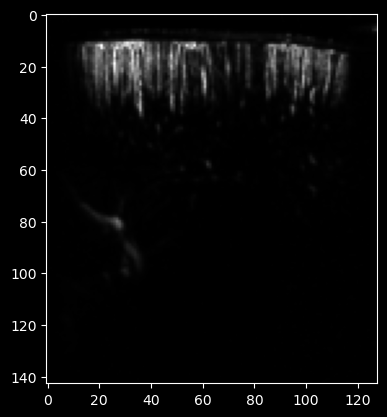

In [11]:
data = corrected_img.get_fdata()
plt.imshow(np.rot90(data[:,0,:,0]), cmap='gray')
plt.show()

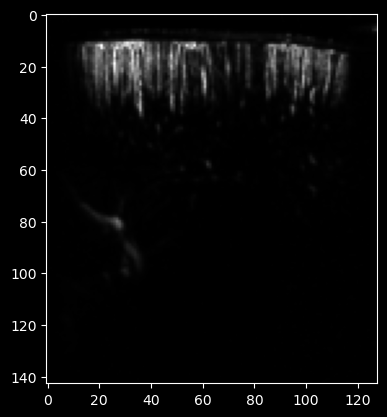

In [14]:
data = nib.load(os.path.join(data_dir, 'Grouper_audiocue_053124_corrected.nii.gz')).get_fdata()
plt.imshow(np.rot90(data[:,0,:]), cmap='gray')
plt.show()

Slice: 78


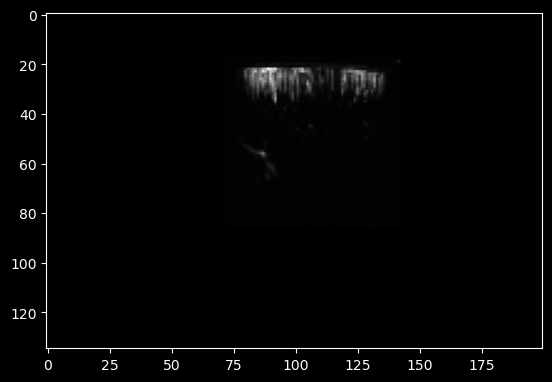

Slice: 79


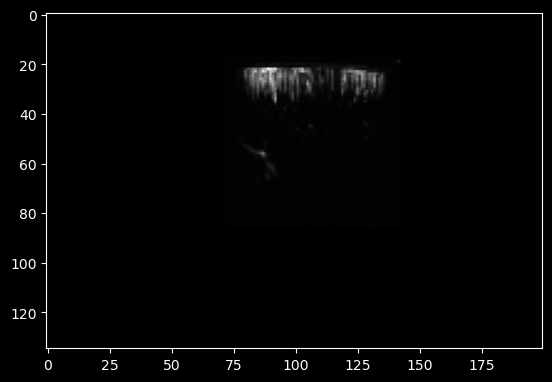

In [28]:
transformed_file = os.path.join(base_dir, "slice2chunk_grouper", "053124_7-5", 'Grouper_audiocue_053124_corrected-transformed2.nii.gz')

data = nib.load(transformed_file).get_fdata()
for i in range(78,80):
    print(f"Slice: {i}")
    plt.imshow(np.rot90(data[i,:,:]), cmap='gray')
    plt.show()

## 06/03/2024 Plane 8.5

In [25]:
data_dir = os.path.join(task_dir, 'Grouper_0603_8.5')
file1 = os.path.join(data_dir, 'Grouper_audiocue_060324_fus2D.2Dscan_1_fus2D.source.nii')
file2 = os.path.join(data_dir, 'Grouper_audiocue_060324_fus2D.2Dscan_1_fus2D.source.nii.gz')

nifit_info(file1), nifit_info(file2)


pixdim[1,2,3] should be positive; setting to abs of pixdim values


(((128, 1, 143, 9000),
  array([[-0.11      ,  0.        ,  0.        ,  6.98499996],
         [ 0.        ,  0.40000001,  0.        , -0.        ],
         [ 0.        ,  0.        ,  0.09856   , -6.99775986],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  ('L', 'A', 'S')),
 ((128, 1, 143),
  array([[ 0.11      ,  0.        ,  0.        , -0.        ],
         [ 0.        ,  0.40000001,  0.        , -0.        ],
         [ 0.        ,  0.        , -0.09856   ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  ('R', 'A', 'I')))

In [26]:
output_path = os.path.join(data_dir, 'Grouper_audiocue_060324_corrected3.nii.gz')

# Process and save the corrected image
process_and_save_image(file1, file2, output_path)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Corrected Affine:
 [[ 0.          0.40000001  0.         -0.        ]
 [ 0.11        0.          0.         -0.        ]
 [ 0.          0.         -0.09856     0.        ]
 [ 0.          0.          0.          1.        ]]
Original Orientation Codes: ('R', 'A', 'I')
Corrected Orientation Codes: ('A', 'R', 'I')
Transformed Affine after reflect:
 [[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]]
Corrected image saved to /Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/Grouper_0603_8.5/Grouper_audiocue_060324_corrected3.nii.gz


In [22]:
outfile = os.path.join(data_dir, 'Grouper_audiocue_060324_corrected2.nii.gz')
corrected_img = correct4registration(infile1=file1, infile2=file2, outfile=outfile)

pixdim[1,2,3] should be positive; setting to abs of pixdim values
pixdim[1,2,3] should be positive; setting to abs of pixdim values


Corrected Affine:
 [[ 0.          0.40000001  0.          0.        ]
 [ 0.11        0.          0.          0.        ]
 [ 0.          0.         -0.09856     0.        ]
 [ 0.          0.          0.          1.        ]]
('A', 'R', 'I')
Transformed Affine after reflect:
 [[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]]
[[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]] ('A', 'R', 'S')


In [24]:
ref_img_file = os.path.join(base_dir, "fus2mri", "fusi_corrected-transformed.nii.gz")
moving_img_file = os.path.join(data_dir, 'Grouper_audiocue_060324_corrected.nii.gz')
transform_file = os.path.join(base_dir, "slice2chunk_grouper", "060324_8-5", "Transform.h5")

output_file = os.path.join(base_dir, "slice2chunk_grouper", "060324_8-5", 'Grouper_audiocue_060324_corrected-transformed2.nii.gz')
slice2chunk_align(ref_img_file, moving_img_file, transform_file, output_file)

In [25]:
transformed_file = os.path.join(base_dir, "slice2chunk_grouper", "060324_8-5", "Grouper_audiocue_060324_corrected-transformed.nii.gz")
data = nib.load(transformed_file).get_fdata()
nifit_info(transformed_file)

((147, 200, 135),
 array([[  0.2       ,   0.        ,  -0.        , -14.60000038],
        [  0.        ,   0.2       ,  -0.        , -14.40000057],
        [  0.        ,   0.        ,   0.2       ,  -3.60000014],
        [  0.        ,   0.        ,   0.        ,   1.        ]]),
 ('R', 'A', 'S'))

In [26]:
transformed_file = os.path.join(base_dir, "slice2chunk_grouper", "060324_8-5", "Grouper_audiocue_060324_corrected-transformed2.nii.gz")
data = nib.load(transformed_file).get_fdata()
nifit_info(transformed_file)

((147, 200, 135),
 array([[  0.2       ,   0.        ,  -0.        , -14.60000038],
        [  0.        ,   0.2       ,  -0.        , -14.40000057],
        [  0.        ,   0.        ,   0.2       ,  -3.60000014],
        [  0.        ,   0.        ,   0.        ,   1.        ]]),
 ('R', 'A', 'S'))

Slice: 87


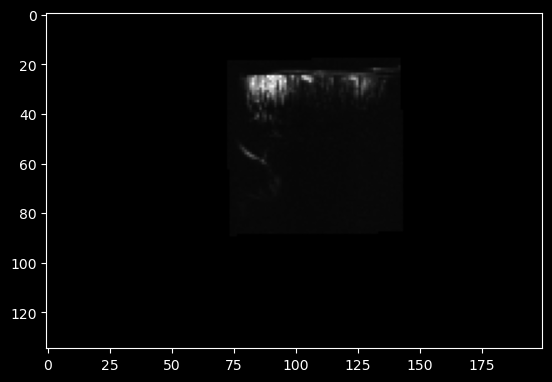

Slice: 88


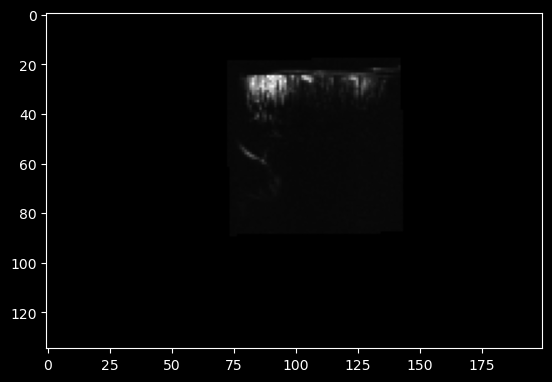

In [31]:
transformed_file = os.path.join(base_dir, "slice2chunk_grouper", "060324_8-5", 'Grouper_audiocue_060324_corrected-transformed2.nii.gz')

data = nib.load(transformed_file).get_fdata()
for i in range(87,89):
    print(f"Slice: {i}")
    plt.imshow(np.rot90(data[i,:,:]), cmap='gray')
    plt.show()

# Extrat ROI

In [152]:
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

def load_nifti_data(nifti_path):
    img = nib.load(nifti_path)
    return img, img.get_fdata(), img.affine

def find_nonzero_boundaries(data, axis):
    projection = np.max(data, axis=axis)
    
    if axis == 2:  # Coronal slice: projection along Z-axis
        x_nonzero = np.any(projection, axis=1)  # Check non-zero in the x-direction (axis 1)
        y_nonzero = np.any(projection, axis=0)  # Check non-zero in the y-direction (axis 0)
        x_start, x_end = np.where(x_nonzero)[0][[0, -1]]
        y_start, y_end = np.where(y_nonzero)[0][[0, -1]]
        return (x_start, x_end), (y_start, y_end)
    
    elif axis == 0:  # Sagittal slice: projection along X-axis
        z_nonzero = np.any(projection, axis=0)  # Check non-zero in the z-direction (axis 1)
        z_start, z_end = np.where(z_nonzero)[0][[0, -1]]
        return (z_start, z_end)
    
    else:
        raise ValueError("Invalid axis. Axis must be 0 (sagittal) or 2 (coronal).")

def highlight_chunk_boundaries(chunk_data, x_bounds, y_bounds, z_bounds):
    highlight = np.zeros_like(chunk_data)
    highlight[x_bounds[0]:x_bounds[1]+1, y_bounds[0]:y_bounds[1]+1, z_bounds[0]:z_bounds[1]+1] = 1
    return highlight

def map_labels_to_chunk(atlas_img, chunk_img, chunk_highlight):
    atlas_data = atlas_img.get_fdata()
    atlas_affine = atlas_img.affine
    chunk_affine = chunk_img.affine

    chunk_origin_world = np.dot(chunk_affine, [0, 0, 0, 1])[:3]
    chunk_origin_atlas_voxel = np.linalg.inv(atlas_affine).dot(np.append(chunk_origin_world, 1))[:3]
    chunk_origin_atlas_voxel = np.round(chunk_origin_atlas_voxel).astype(int)

    chunk_extent_world = np.dot(chunk_affine, np.array([chunk_img.shape[0], chunk_img.shape[1], chunk_img.shape[2], 1]) - 1)[:3]
    chunk_extent_atlas_voxel = np.linalg.inv(atlas_affine).dot(np.append(chunk_extent_world, 1))[:3]
    chunk_extent_atlas_voxel = np.round(chunk_extent_atlas_voxel).astype(int)

    chunk_labels = atlas_data[
        chunk_origin_atlas_voxel[0]:chunk_extent_atlas_voxel[0] + 1,
        chunk_origin_atlas_voxel[1]:chunk_extent_atlas_voxel[1] + 1,
        chunk_origin_atlas_voxel[2]:chunk_extent_atlas_voxel[2] + 1
    ]

    chunk_labels *= chunk_highlight
    return nib.Nifti1Image(chunk_labels.astype(np.int32), chunk_affine, header=nib.Nifti1Header())

def adjust_subcortical_labels(chunk_labels_data, threshold):
    revised_data = np.copy(chunk_labels_data)
    revised_data[chunk_labels_data > 0] += threshold
    return revised_data

def generate_label_index_dict(cortical_labels, subcortical_labels_df, threshold):
    subcortical_labels_df["Labels"] += threshold
    subcortical_labels = dict(zip(subcortical_labels_df["Name"], subcortical_labels_df["Labels"]))
    label_dict = cortical_labels | subcortical_labels
    
    for k, v in label_dict.items():
        label_dict[k] = np.array(v)
    
    idx = np.arange(1, len(label_dict.keys()) + 1)
    return dict(zip(label_dict.keys(), idx)), label_dict

def relabel_chunk_data(chunk_labels_data, label_dict, label_idx_dict):
    chunk_label_new = np.zeros_like(chunk_labels_data)
    for i in np.unique(chunk_labels_data):
        for k, v in label_dict.items():
            if i in v:
                chunk_label_new[chunk_labels_data == i] = label_idx_dict[k]
    return chunk_label_new

def plot_sagittal_slice(label_idx_dict, x_index, chunk_label_new, title):
    label_idx_dict_inverse = {v: k for k, v in label_idx_dict.items()}
    slice_data = np.rot90(chunk_label_new[x_index, :, :])
    masked_slice_data = np.ma.masked_where(slice_data == 0, slice_data)
    unique_values = np.unique(masked_slice_data.compressed())

    value_map = {old: new for new, old in enumerate(unique_values, start=1)}
    mapped_slice_data = np.vectorize(lambda x: value_map.get(x, 0))(masked_slice_data)

    if len(unique_values) > 0:
        colors = sns.color_palette(palette="tab20", n_colors=len(unique_values)).as_hex()
        cmap = mcolors.ListedColormap(colors)
    else:
        cmap = mcolors.ListedColormap(['#FFFFFF'])

    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.imshow(mapped_slice_data, cmap=cmap, vmin=1, vmax=len(unique_values) + 0.5 if len(unique_values) > 0 else 1)

    if len(unique_values) > 0:
        midpoints = np.arange(1, len(unique_values) + 1) + 0.9 / len(unique_values)
        cbar = plt.colorbar(cax, ticks=midpoints)
        cbar.set_ticklabels([label_idx_dict_inverse[val] for val in unique_values], fontsize=15)
    else:
        print("Warning: No unique values found. Skipping color bar creation.")

    ax.set_xlabel('Posterior -> Anterior', fontsize=15)
    ax.set_ylabel('Inferior -> Superior', fontsize=15)
    ax.set_title(f'{title} Sagittal', fontsize=15)
    plt.show()

In [153]:
cortical_atlas_path = os.path.join(base_dir, 'atlas', 'atlas_MBM_cortex_vH.nii.gz')
subcortical_atlas_path = os.path.join(base_dir, 'atlas', 'atlas_MBM_subcortical_beta.nii.gz')
chunk_nifti_path = os.path.join(base_dir, 'chunk2whole_grouper', 'Grouper_3D_corrected-transformed.nii.gz')

In [154]:
cortical_atlas_img, cortical_atlas_data, cortical_atlas_affine = load_nifti_data(cortical_atlas_path)
subcortical_atlas_img, subcortical_atlas_data, subcortical_atlas_affine = load_nifti_data(subcortical_atlas_path)
chunk_img, chunk_data, chunk_affine = load_nifti_data(chunk_nifti_path)

x_bounds, y_bounds = find_nonzero_boundaries(chunk_data, axis=2)
z_bounds = find_nonzero_boundaries(chunk_data, axis=0)

chunk_highlight = highlight_chunk_boundaries(chunk_data, x_bounds, y_bounds, z_bounds)

cortical_labels_img = map_labels_to_chunk(cortical_atlas_img, chunk_img, chunk_highlight)
subcortical_labels_img = map_labels_to_chunk(subcortical_atlas_img, chunk_img, chunk_highlight)

chunk_labels_data_subcortical = subcortical_labels_img.get_fdata()
chunk_labels_data_subcortical_revised = adjust_subcortical_labels(chunk_labels_data_subcortical, threshold=107)

In [155]:
x_bounds, y_bounds, z_bounds

((64, 108), (69, 141), (41, 120))

In [156]:
cortical_labels = {
    "DLPFC": np.arange(1,6,1),
    "VLPFC": np.arange(6,10,1),
    "MPFC": np.arange(10,17,1),
    "OFC": np.arange(17,24,1),
    "Motor and premotor": np.arange(24,29,1),
    "Somatosensory": np.arange(29,34,1),
    "Auditory": np.arange(34,40,1),
    "Insula and others": np.arange(40,47,1),
    "Lateral and inferior temporal": np.arange(47,58,1),
    "Ventral temporal": np.arange(58,67,1),
    "Posterior parietal": np.arange(67,79,1),
    "Posterior cingulate and restrospenial ": np.arange(79,89,1),
    "Visual": np.arange(89,107,1),
}

subcortical_labels_df = pd.read_csv(os.path.join(base_dir, "atlas", "atlas_MBM_subcortical_beta_label.csv"))

label_idx_dict, label_dict = generate_label_index_dict(cortical_labels, subcortical_labels_df, threshold=107)

chunk_labels_data = cortical_labels_img.get_fdata() + chunk_labels_data_subcortical_revised
chunk_label_new = relabel_chunk_data(chunk_labels_data, label_dict, label_idx_dict)

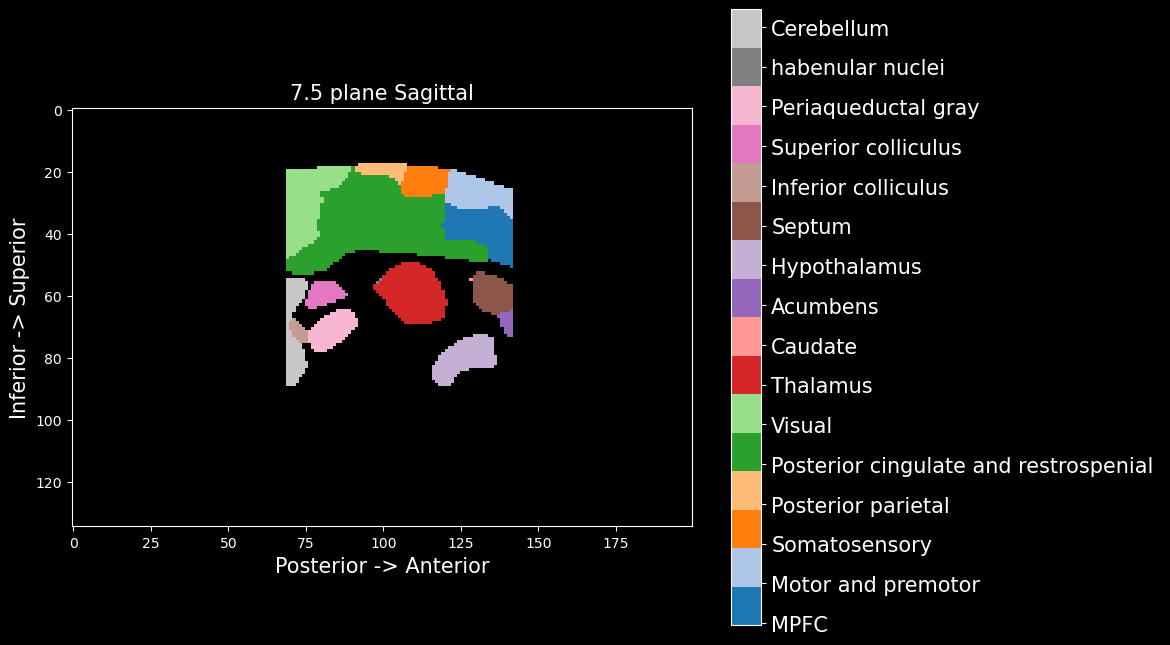

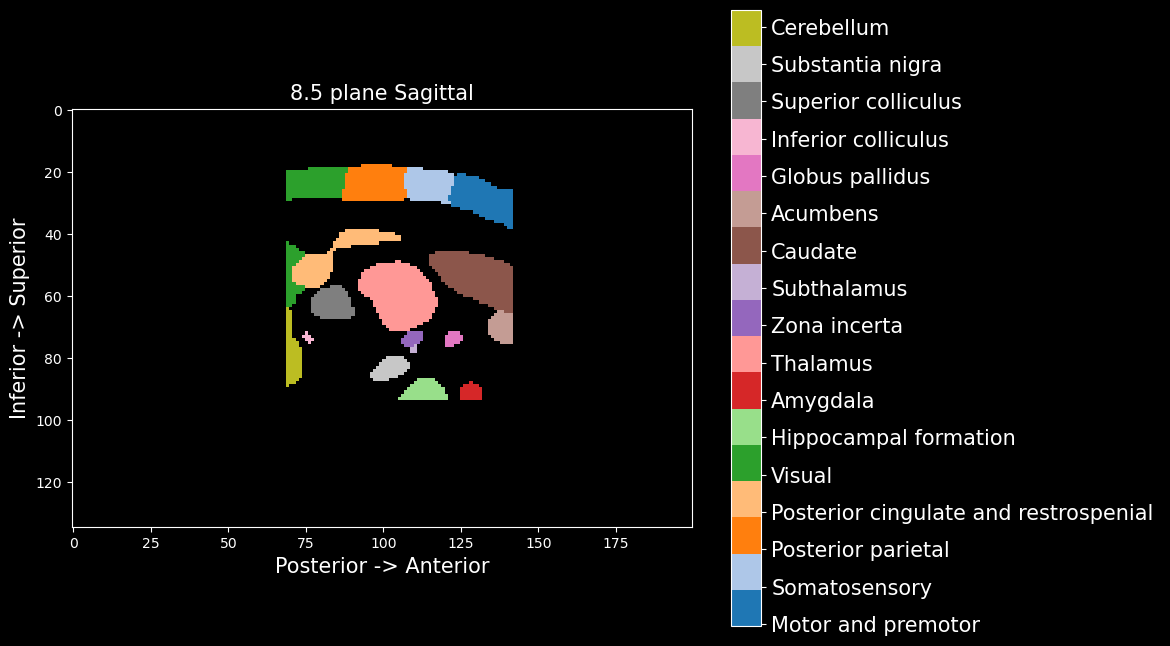

In [157]:
plot_sagittal_slice(label_idx_dict=label_idx_dict, x_index=78, chunk_label_new=chunk_label_new, title='7.5 plane')
plot_sagittal_slice(label_idx_dict=label_idx_dict, x_index=87, chunk_label_new=chunk_label_new, title='8.5 plane')

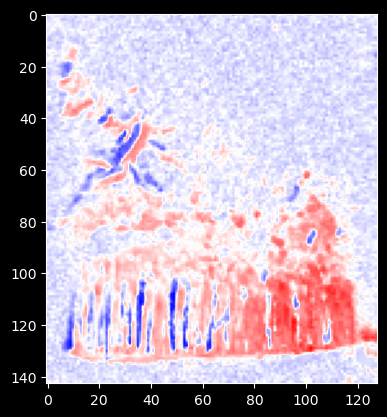

In [158]:
plt.imshow(results75['reward'].reshape(128, 143).T, cmap='bwr')
plt.show()

In [159]:
def invert_label_dict(label_idx_dict):
    return {v: k for k, v in label_idx_dict.items()}

def prepare_slice_data(chunk_label_new, x_index):
    slice_data = np.rot90(chunk_label_new[x_index, :, :])
    masked_slice_data = np.ma.masked_where(slice_data == 0, slice_data)
    unique_values = np.unique(masked_slice_data.compressed())
    return masked_slice_data, unique_values

def map_slice_data(masked_slice_data, unique_values):
    value_map = {old: new for new, old in enumerate(unique_values, start=1)}
    return np.vectorize(lambda x: value_map.get(x, 0))(masked_slice_data)

def create_colormap(unique_values):
    if len(unique_values) > 0:
        colors = sns.color_palette(palette="tab20", n_colors=len(unique_values)).as_hex()
        return mcolors.ListedColormap(colors)
    else:
        return mcolors.ListedColormap(['#FFFFFF'])

def plot_slice(ax, mapped_slice_data, cmap, unique_values):
    cax = ax.imshow(mapped_slice_data, cmap=cmap, vmin=1, vmax=len(unique_values) + 0.5 if len(unique_values) > 0 else 1)
    return cax

def add_colorbar(fig, ax, cax, unique_values, label_idx_dict_inverse):
    if len(unique_values) > 0:
        midpoints = np.arange(1, len(unique_values) + 1) + 0.9 / len(unique_values)
        cbar = fig.colorbar(cax, ax=ax, ticks=midpoints)
        cbar.set_ticklabels([label_idx_dict_inverse[val] for val in unique_values], fontsize=15)
    else:
        print("Warning: No unique values found. Skipping color bar creation.")


In [160]:
def plot_slices_side_by_side(label_idx_dict, x_index, chunk_label_new, title, other_image, other_image_title):
    # Invert label dictionary
    label_idx_dict_inverse = invert_label_dict(label_idx_dict)
    
    # Prepare and map slice data
    masked_slice_data, unique_values = prepare_slice_data(chunk_label_new, x_index)
    mapped_slice_data = map_slice_data(masked_slice_data, unique_values)
    
    # Create colormap
    cmap = create_colormap(unique_values)
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))
     # Plot the other image
    axs[0].imshow(np.rot90(other_image), cmap='bwr', vmin=-15, vmax=15)
    axs[0].set_title(other_image_title, fontsize=15)
    fig.colorbar(axs[0].images[0], ax=axs[0])


    # Plot the sagittal slice
    cax = plot_slice(axs[1], mapped_slice_data, cmap, unique_values)
    add_colorbar(fig, axs[1], cax, unique_values, label_idx_dict_inverse)
    
    # Set labels and title for the sagittal slice
    axs[1].set_xlabel('Posterior -> Anterior', fontsize=15)
    axs[1].set_ylabel('Inferior -> Superior', fontsize=15)
    axs[1].set_title(f'{title} Sagittal', fontsize=15)
    
   
    
    # Show the plot
    plt.show()

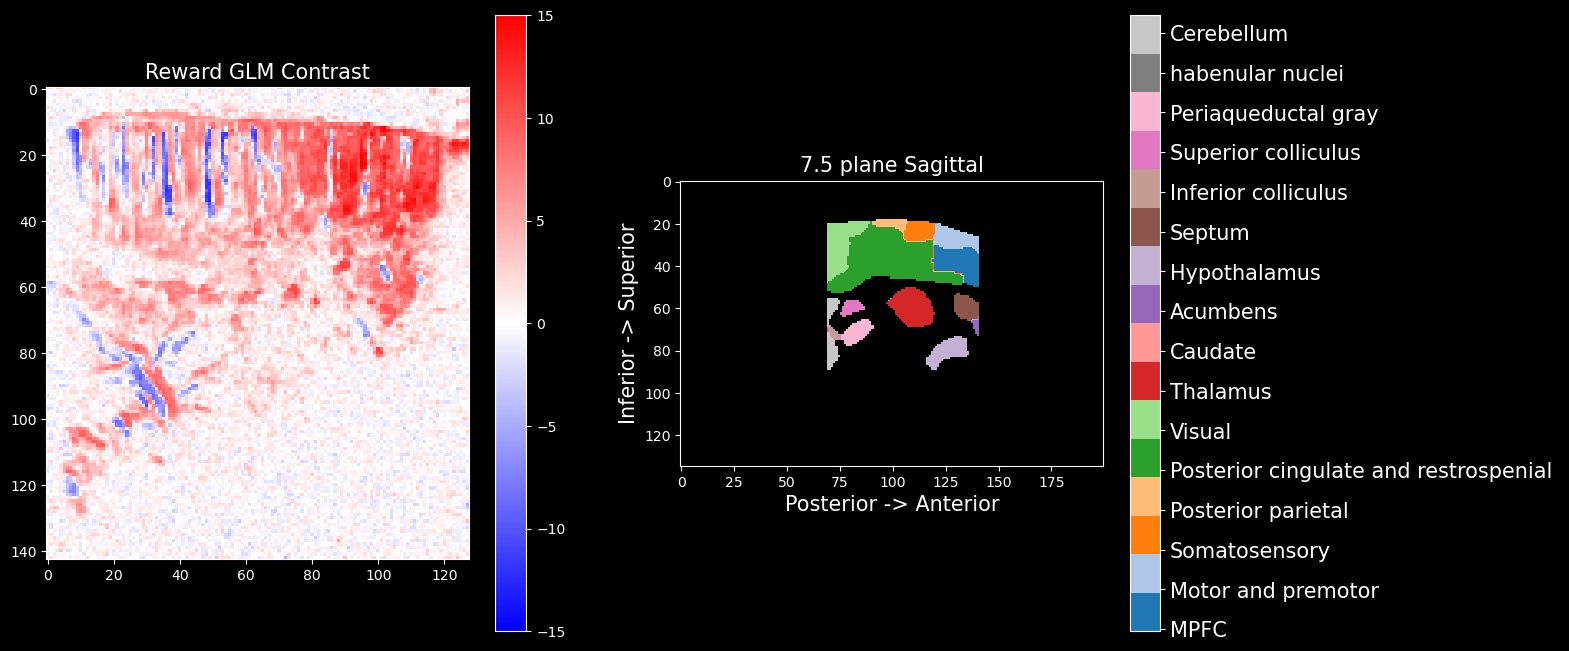

In [161]:
# Example usage:
other_image = results75['reward'].reshape(128, 143)
plot_slices_side_by_side(label_idx_dict, 78, chunk_label_new, '7.5 plane', other_image, 'Reward GLM Contrast')


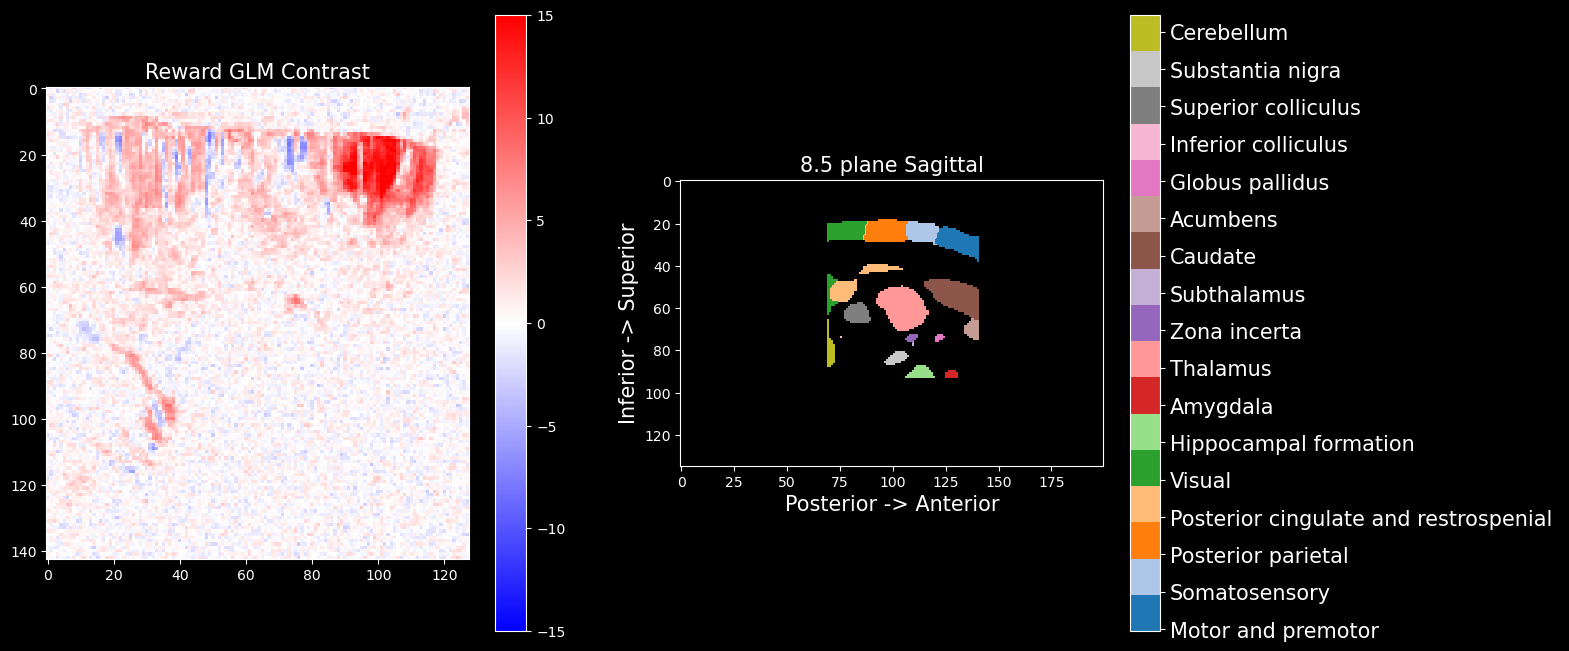

In [164]:
# Example usage:
other_image = results85['reward'].reshape(128, 143)
plot_slices_side_by_side(label_idx_dict, 87, chunk_label_new, '8.5 plane', other_image, 'Reward GLM Contrast')


In [141]:
data_dir = os.path.join(task_dir, 'Grouper_0603_8.5')
brain_filename = 'Grouper_audiocue_060324_corrected2.nii.gz'
original_img = nib.load(os.path.join(data_dir, brain_filename))
contrast_result_reshaped = results85['reward'].reshape(128, 1, 143)
new_img = nib.Nifti1Image(contrast_result_reshaped, affine=original_img.affine, header=original_img.header)
new_img.to_filename(os.path.join(data_dir, 'reward_contrast_reshaped.nii.gz'))

In [195]:
original_img.shape

(128, 1, 143, 9000)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


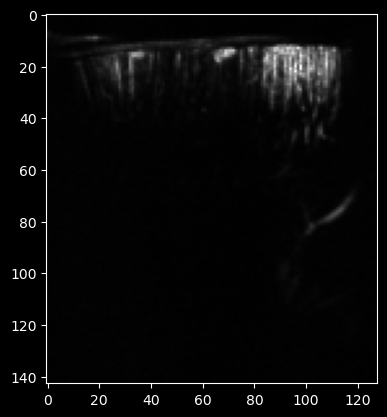

In [198]:
data_dir = os.path.join(task_dir, 'Grouper_0603_8.5')
# brain_filename = 'Grouper_audiocue_053124_corrected.nii.gz'
brain_filename = 'Grouper_audiocue_060324_fus2D.2Dscan_1_fus2D.source.nii'
original_img = nib.load(os.path.join(data_dir, brain_filename))

plt.imshow(original_img.get_fdata()[:,0,:, 0].T, cmap='gray')
plt.show()

In [162]:
ref_img_file = os.path.join(base_dir, "fus2mri", "fusi_corrected-transformed.nii.gz")
moving_img_file = os.path.join(data_dir, 'Grouper_audiocue_060324_corrected.nii.gz')
transform_file = os.path.join(base_dir, "slice2chunk_grouper", "060324_8-5", "Transform.h5")

output_file = os.path.join(base_dir, "slice2chunk_grouper", "060324_8-5", 'Grouper_audiocue_060324_corrected-transformed3.nii.gz')
slice2chunk_align(ref_img_file, moving_img_file, transform_file, output_file)

In [173]:
original_img.affine, 

(array([[0.        , 0.40000001, 0.        , 0.        ],
        [0.11      , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.09856   , 0.        ],
        [0.        , 0.        , 0.        , 1.        ]]),
 <nibabel.nifti1.Nifti1Header at 0x31f340c70>)

In [175]:
original_img.header

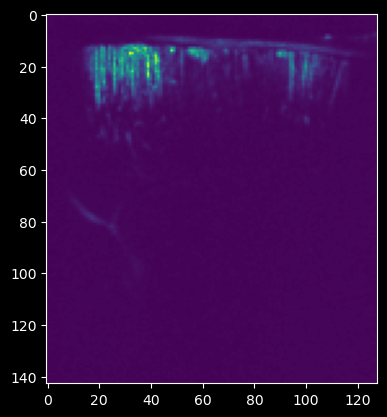

In [192]:
plt.imshow(np.rot90(original_img.get_fdata()[:, 0, :, 7100]))
plt.show()

In [171]:
results85['reward'].reshape(128, 1, 143)

(128, 1, 143)

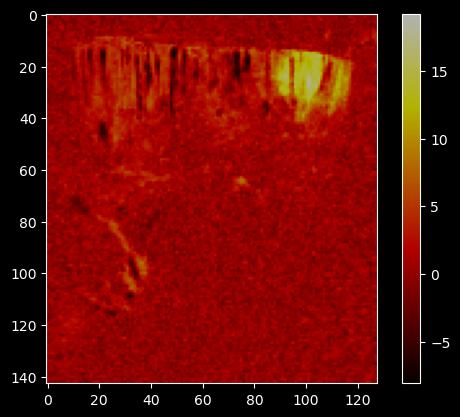

In [199]:
plt.imshow(np.rot90(results85['reward'].reshape(128, 1, 143)[:, 0, :]), cmap='hot', alpha=0.7) 
plt.colorbar()
plt.show()

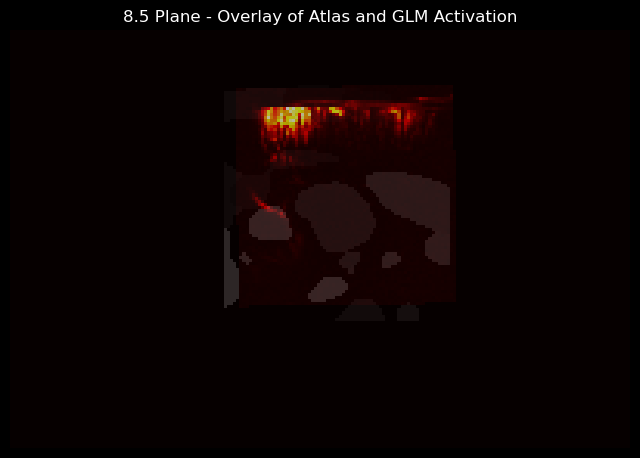

In [165]:
x_index = 87

masked_slice_data, unique_values = prepare_slice_data(chunk_label_new, x_index)
mapped_slice_data = map_slice_data(masked_slice_data, unique_values)

glm_img = nib.load(output_file)

glm_data = glm_img.get_fdata()

plt.figure(figsize=(8, 8))

# Display the atlas slice
plt.imshow(mapped_slice_data, cmap='gray', alpha=0.5)  # Adjust alpha for transparency

# Overlay the GLM activation data
plt.imshow(np.rot90(data[87,:,:]), cmap='hot', alpha=0.7)  # Adjust alpha for transparency

# plt.colorbar()

plt.title('8.5 Plane - Overlay of Atlas and GLM Activation')
plt.axis('off')

# Show the plot
plt.show()


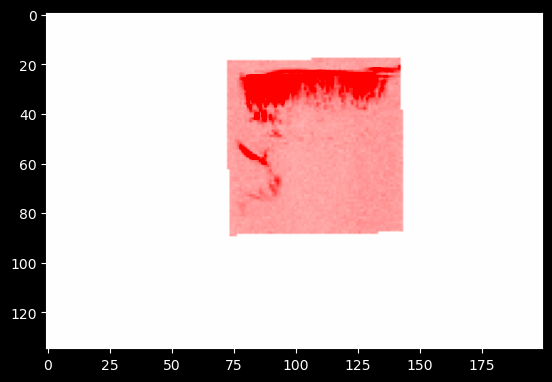

In [149]:
aligned_img = nib.load(output_file)

data = aligned_img.get_fdata()
plt.imshow(np.rot90(data[87,:,:]), cmap='bwr', vmin=-15, vmax=15)
plt.show()

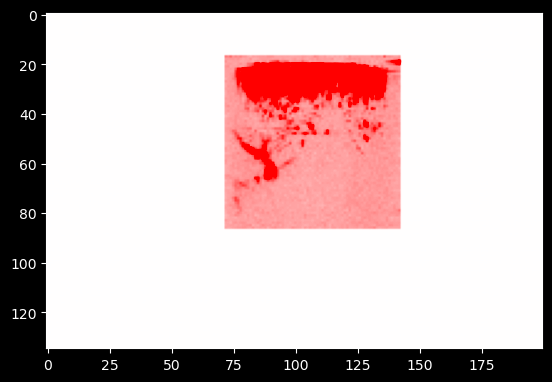

In [134]:
aligned_img = nib.load(output_file)

data = aligned_img.get_fdata()
plt.imshow(np.rot90(data[78,:,:]), cmap='bwr', vmin=-15, vmax=15)
plt.show()